In [1]:
using StatsBase, Distributions, PyPlot
include("mbsampler.jl") 
using PyPlot, TimeIt, Distributions, Optim
include("ZZ_subsampling.jl")
include("ZZ_clustering.jl") 

ZZ_clustering (generic function with 6 methods)

In [2]:
function logistic_data(d, Nobs, β_true, px, py=0.1) 
    X = ones(d, Nobs)
    X[2:end,:] = rand(Normal(), d-1, Nobs).*rand(Binomial(1,px), d-1, Nobs) 
    #y = [rand(Binomial(1,1./(1+exp.(-X[:,j]'β_true))), 1)[1] for j in 1:Nobs]
    y = rand(Binomial(1,py), Nobs)
    return X, y
end

logistic_data (generic function with 2 methods)

In [3]:
d = 3
Nobs = 10^4
px = 5e-1
py = 5e-1
β_true = rand(d)
X, y = logistic_data(d, Nobs, β_true, px, py)
σ = 2
A = eye(d)
# root = find_root(X, y, σ)
sum(y)

4948

In [4]:
root = find_root(X, y, σ)

3-element Array{Float64,1}:
 -0.0208026 
 -0.0290754 
 -0.00436319

In [5]:
d, Nobs = size(X)
gradient_root = zeros(d, Nobs)
for n in 1:Nobs 
    gradient_root[:,n] = [derivative(X[:,n], y[n], k, root, Nobs, σ)[1] for k in 1:d]
end

In [6]:
for i in 3
    p = sortperm(gradient_root[i,:])
    vector = gradient_root[i,p]
    score = comp_score_wc(vector)
    #plot(score)
    #print(comp_minscore_fast(vector,"wc"))
end

clusters = [get_clustering_vec(gradient_root[i,:], 10, "wc") for i in 1:d];

[1

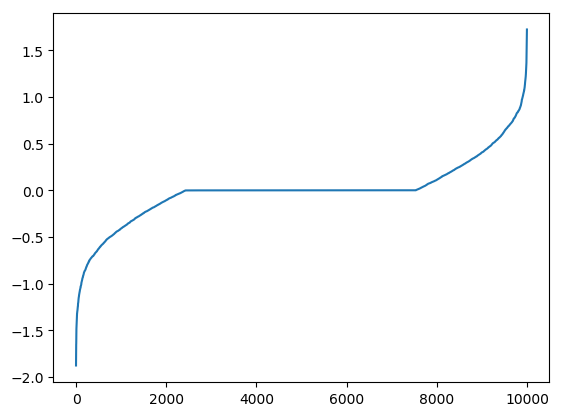

 139; 2431 7532; 8513 9137; 556 1410; 9671 9915; 7532 8513; 1410 2430; 139 556; 9137 9671; 9915 10000]

In [7]:
N_cluster=10
mode = "wc"
for i in 3
    p = sortperm(gradient_root[i,:])
    vector = gradient_root[i,p]
    score = comp_score_wc(vector)
    split_table = greedy_split_cluster(vector, N_cluster, mode)
    print(split_table)
    plot(vector)
    #print(comp_minscore_fast(vector,"wc"))
end

#split_table = greedy_split_cluster(vector, N_cluster, mode)

In [22]:
w = [.1,.1,.2,.2,.05,.1,0.1]
w/=sum(w)
N, = size(w)
x = 1:N
mb_size =10
clusters = [[1,2,3,4],[5,6,7]]

scp = [mb_size/2,mb_size/2]

csamplers = Array{mbsampler}(2)
for (ci, c) in enumerate(clusters)
    csamplers[ci] = wumbsampler(size(c)[1], scp[ci], w[c])
end

gw = cmbsampler(csamplers, clusters)


cmbsampler(7, 10, [0.171429, 0.171429, 0.0857143, 0.0857143, 0.142857, 0.0714286, 0.0714286], mbsampler[wumbsampler(4, 5, [0.3, 0.3, 0.15, 0.15], [0.166667, 0.166667, 0.333333, 0.333333]), wumbsampler(3, 5, [0.333333, 0.166667, 0.166667], [0.2, 0.4, 0.4])], Array{Int64,1}[[1, 2, 3, 4], [5, 6, 7]], 2, [4, 3], [5 1 5; 5 6 10])

In [20]:
size(clusters[1][1])

(253,)